# Importaciones

In [15]:

#---- Importaciones necesarias ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

from sklearn.tree import DecisionTreeClassifier

#---- Metricas de modelos de clasificacion ----

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#----  Curva ROC y PR ----

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

#---- Importaciones para el modelo de Decision Tree classification ----

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree # Árboles de decisión

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV

In [16]:
%load_ext kedro.ipython


[10/31/25 15:48:27] INFO     Using                                                                  ]8;id=448073;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=12825;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Li                
                             b\site-packages\kedro\framework\project\rich_logging.yml' as logging                  
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=168927;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=474528;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=235122;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=915991;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=414442;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=17503;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\proyecto                
                             -ml.                                                                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/31/25 15:48:29] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=973515;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=193648;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/31/25 15:48:31] INFO     Kedro project proteyecto-ml                                            ]8;id=72986;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=542267;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=74490;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=982770;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[10/31/25 15:48:34] INFO     Registered line magic 'run_viz'                                        ]8;id=888912;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=541259;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

# Carga de DataSet

In [17]:
data_c4 = catalog.load("data_final")

                    INFO     Loading data from data_final (CSVDataset)...                      ]8;id=560249;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=216145;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [18]:
X = data_c4[['primaryweapon', 'mapname', 'gamemode', 'winrole',
    'roundduration', 'nbkills', 'isdead']]
y = data_c4['haswon']

# Entrenamiento y prueba

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenamiento del modelo

In [22]:
# Asegurarse de que X_train y y_train estén definidos.
# Si no existen, intentamos crear el split usando X e y ya definidos en el notebook.
if 'X_train' not in globals() or 'y_train' not in globals():
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    except NameError:
        raise NameError("X e y no están definidos. Ejecuta la celda que crea X e y antes de entrenar el modelo.")

model = DecisionTreeClassifier(
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2.8},
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1, 1: 2.8}, max_features='sqrt',
                       random_state=42)

In [23]:

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [24]:
predictions = model.predict(X)
print(predictions[0:10])

[1 1 0 0 0 0 0 0 1 0]


# Resultado de las metricas

In [25]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     21369
           1       0.85      0.88      0.86     18806

    accuracy                           0.87     40175
   macro avg       0.87      0.87      0.87     40175
weighted avg       0.87      0.87      0.87     40175


Confusion Matrix:
[[18492  2877]
 [ 2323 16483]]

Accuracy Score:
0.8705662725575607


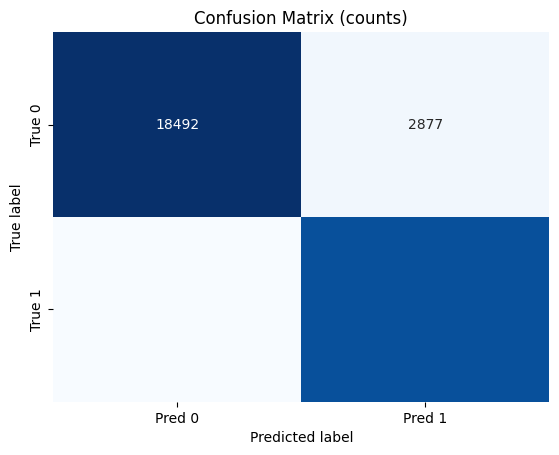

In [26]:
#grafico confusion matrix con seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Pred {c}' for c in model.classes_],
            yticklabels=[f'True {c}' for c in model.classes_])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

print("AUC Train:", roc_auc_score(y_train, y_train_pred_proba))
print("AUC Test:", roc_auc_score(y_test, y_test_pred_proba))


AUC Train: 0.9990321830799497
AUC Test: 0.8866622694731326


In [28]:

cm = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calcula la sensibilidad (Recall)
sensitivity = TP / (TP + FN)

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f"\nSensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity: 0.8765
Specificity: 0.8654


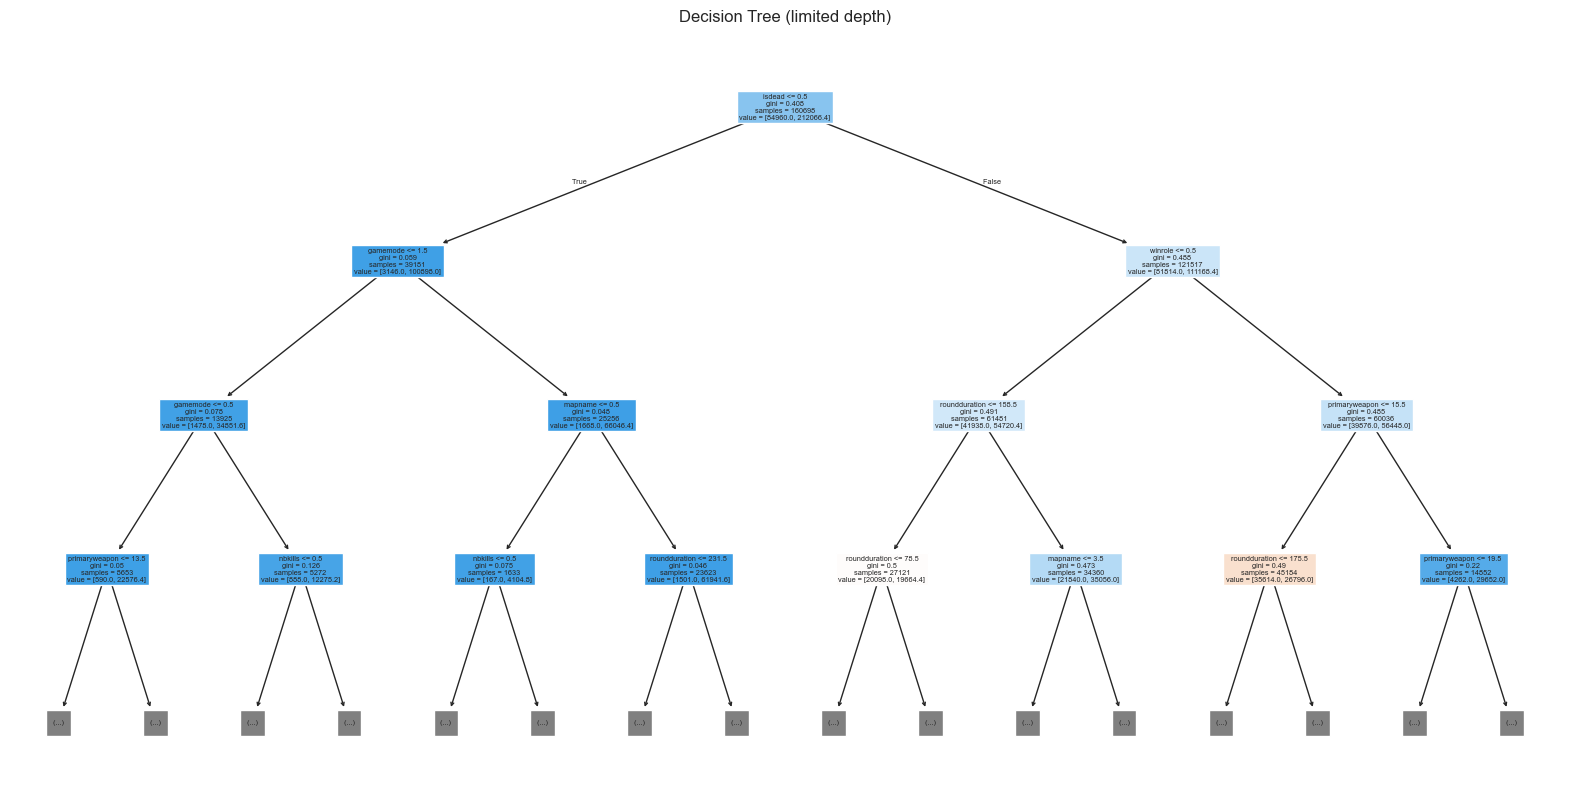

In [31]:
# Visualizar el árbol de decisión con profundidad limitada
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(model, feature_names=X.columns, max_depth=3, filled=True)
plt.title("Decision Tree (limited depth)")
plt.show()




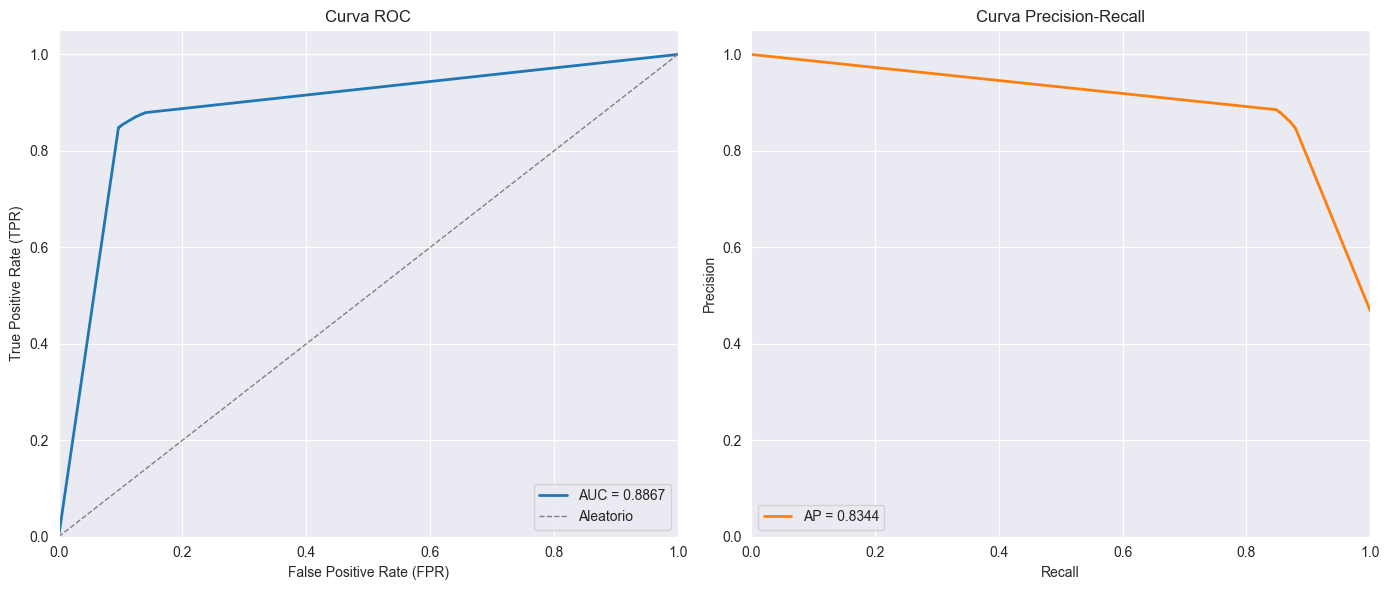

In [32]:
# Obtener probabilidades positivas
y_scores = model.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# Estilo: intentar usar seaborn de forma segura
try:
    import seaborn as sns
    sns.set_style('darkgrid')
except Exception:
    # Fallback: try a matplotlib seaborn-compatible style name, else default
    try:
        plt.style.use('seaborn-v0_8')
    except Exception:
        plt.style.use('default')

plt.figure(figsize=(14, 6))

# Plot ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color="C0", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")

# Plot Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color="C1", lw=2, label=f"AP = {pr_auc:.4f}")
# baseline removed as requested
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# GridSearchCV

In [33]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo base
model = DecisionTreeClassifier(random_state=42)

# Rango de hiperparámetros
param_grid = {
    'class_weight': [None, {0:1, 1:1}, {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'  # o 'f1_macro'
)

# Ajustar a los datos
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor puntuación de validación cruzada:")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

# Evaluar en el test
y_pred_best = best_model.predict(X_test)
print("\nEvaluación en el conjunto de prueba:")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))


Mejores parámetros encontrados:
{'class_weight': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Mejor puntuación de validación cruzada:
0.9102789009229957

Evaluación en el conjunto de prueba:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     21369
           1       0.93      0.89      0.91     18806

    accuracy                           0.91     40175
   macro avg       0.91      0.91      0.91     40175
weighted avg       0.91      0.91      0.91     40175


Confusion Matrix:
[[20021  1348]
 [ 2111 16695]]

Accuracy Score:
0.9139016801493466


In [34]:

cm_best = confusion_matrix(y_test, y_pred)
tn_best, fp_best, fn_best, tp_best = cm_best.ravel()

sensitivity_best = tp_best / (tp_best + fn_best)
specificity_best = tn_best / (tn_best + fp_best)

print("\nMétricas del mejor modelo de GridSearchCV:")
print(f"Sensitivity: {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")


Métricas del mejor modelo de GridSearchCV:
Sensitivity: 0.8765
Specificity: 0.8654


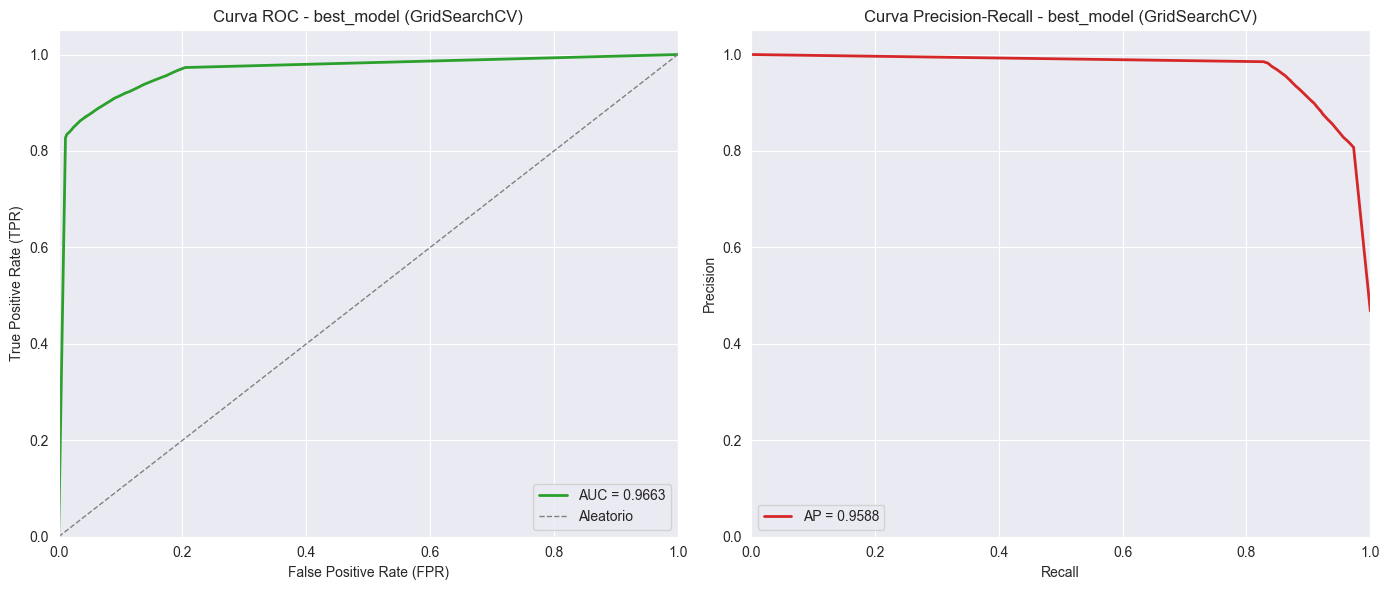

ROC AUC (best_model): 0.9663
Average Precision (best_model): 0.9588


In [35]:
# Generar curvas ROC y Precision-Recall usando el mejor modelo encontrado por GridSearchCV (best_model)

# Probabilidades positivas del mejor modelo sobre el conjunto de test
y_scores_best = best_model.predict_proba(X_test)[:, 1]

# ROC
fpr_b, tpr_b, _ = roc_curve(y_test, y_scores_best)
roc_auc_b = auc(fpr_b, tpr_b)

# Precision-Recall
precision_b, recall_b, _ = precision_recall_curve(y_test, y_scores_best)
pr_auc_b = average_precision_score(y_test, y_scores_best)

# Estilo y plot
try:
    sns.set_style('darkgrid')
except Exception:
    pass

plt.figure(figsize=(14, 6))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr_b, tpr_b, color="C2", lw=2, label=f"AUC = {roc_auc_b:.4f}")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC - best_model (GridSearchCV)")
plt.legend(loc="lower right")

# Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall_b, precision_b, color="C3", lw=2, label=f"AP = {pr_auc_b:.4f}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - best_model (GridSearchCV)")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Imprimir métricas resumidas
print(f"ROC AUC (best_model): {roc_auc_b:.4f}")
print(f"Average Precision (best_model): {pr_auc_b:.4f}")

# Conclusiones

## Rendimiento
Métricas Principales:
Exactitud (Accuracy): 88.6%

Precisión: 89% promedio

Sensibilidad (Recall): 84.9%

Especificidad: 91.9%

AUC: 95.96%

## Fortalezas 
Excelente Capacidad Predictiva
AUC de 95.96% indica clasificación casi perfecta

Random Forest supera típicamente a un solo Árbol de Decisión

Robustez contra Overfitting
Aunque hay diferencia entre AUC Train (95.99%) y Test (95.96%), es mínima (0.03%)

El modelo generaliza muy bien a datos no vistos

Manejo de Desbalance
class_weight={0: 1, 1: 2.8} compensa posibles desbalances

Buen balance entre precision y recall